In [1]:
import numpy as np
np.random.seed(0)

import pymc3 as pm
import arviz as az

import matplotlib.pyplot as plt

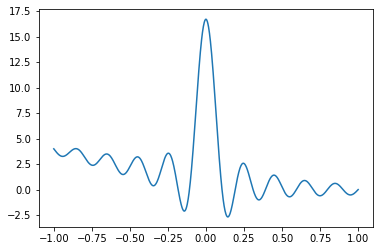

In [2]:
def gramacy_and_lee(x):
    return np.sin(10 * np.pi * x) / (2 * x) + (x - 1) ** 2


xs = np.linspace(-1, 1, 1000)
plt.plot(xs, gramacy_and_lee(xs));

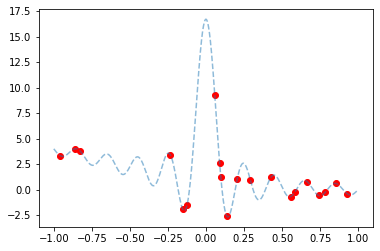

In [3]:
X_sample = np.random.uniform(low=-1, high=1, size=20).reshape(-1, 1)
Y_sample = gramacy_and_lee(X_sample)

plt.plot(xs, gramacy_and_lee(xs), linestyle='--', alpha=0.5)
plt.scatter(X_sample, Y_sample, c='r');

In [4]:
l = 1
eta = 3

with pm.Model() as model:
    cov_func = eta ** 2 * pm.gp.cov.Matern52(1, l)
    mean_func = pm.gp.mean.Zero()
    
    gp = pm.gp.Marginal(mean_func, cov_func)
    obs = gp.marginal_likelihood('obs', X=X_sample, y=Y_sample.squeeze(), noise=0)


You can find the C code in this temporary file: /var/folders/wm/cr9_rg9d40sbj5kr5lkgwrlh0000gn/T/theano_compilation_error_17vt2y3n


Exception: ('Compilation failed (return status=254): clang-10: error: unable to execute command: Segmentation fault: 11. clang-10: error: dsymutil command failed due to signal (use -v to see invocation). ', '[Elemwise{add,no_inplace}(<TensorType(float64, matrix)>, <TensorType(float64, (True, True))>)]')